In [5]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import os
import sys
import requests
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd

url  = "https://home.kahis.go.kr/home/lkntscrinfo/selectLkntsStats.do"

chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Set up the WebDriver 
service = Service(executable_path="/Users/sungyoon/Desktop/test_file/chromedriver-mac-arm64/chromedriver") 
#service = Service(executable_path="/home/sungyoon/chromedriver-linux64/chromedriver") 
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(url)

time.sleep(3)

print(driver.title)

driver.maximize_window()

element1 = driver.find_element(By.CSS_SELECTOR, "#occrFromDtId")
element1.click()
element1.send_keys("19950101")

element2 = driver.find_element(By.CSS_SELECTOR, "#occrToDtId")
element2.click()
element2.send_keys("20231231")

element3 = driver.find_element(By.CSS_SELECTOR, "#lstkspClId > option:nth-child(10)")
element3.click()

time.sleep(1)
search_btn = driver.find_element(By.CSS_SELECTOR, "#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(1) > tbody > tr > td:nth-child(3) > a > img")
search_btn.click()

for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    print(year, Virus_count.text)

# Create a list to store the data
data = []

# Collect data for each year
for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    data.append({"Year": year, "Virus Count": Virus_count.text})

# Create a DataFrame
df_virus = pd.DataFrame(data)

# Display the DataFrame

driver.quit()


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [6]:
print(df_virus)

NameError: name 'df_virus' is not defined

In [7]:
import matplotlib.pyplot as plt

# Ensure Virus Count is numeric for sorting and plotting
df_virus['Virus Count'] = df_virus['Virus Count'].str.replace(',', '').astype(int)

# Sort the DataFrame by Year to ensure correct order
df_virus = df_virus.sort_values(by='Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_virus['Year'], df_virus['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

plt.xlabel('Year')
plt.ylabel('Virus Count')
plt.title('연도별 돼지 바이러스 발생통계')
plt.grid(True)
plt.legend()

plt.show()

NameError: name 'df_virus' is not defined

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "http://www.kmta.or.kr/kr/data/stats_price_year.php"

# 요청
response = requests.get(url)
response.encoding = 'utf-8'

# 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 표 선택
table = soup.select_one("div.contents.p_stats > table")
rows = table.select("tr")

# 연도 및 값 수집
data = []
start_year = 1993
for i, row in enumerate(rows[2:], start=0):  # 헤더 2줄 건너뜀
    if start_year + i > 2024:
        break  # 2024년까지만
    cells = row.find_all("td")
    if len(cells) >= 4:
        value = cells[3].get_text(strip=True)
        year = start_year + i
        data.append({"연도": f"{year}", "도축가": value})

# DataFrame 생성
df_price = pd.DataFrame(data)

# 출력
print(df_price)

      연도    도축가
0   1993  2,151
1   1994  2,373
2   1995  2,298
3   1996  2,490
4   1997  2,422
5   1998  2,514
6   1999  3,017
7   2000  2,499
8   2001  2,599
9   2002  2,645
10  2003  2,444
11  2004  3,479
12  2005  3,730
13  2006  3,649
14  2007  3,247
15  2008  4,046
16  2009  4,449
17  2010  4,232
18  2011  5,808
19  2012  3,974
20  2013  3,570
21  2014  4,741
22  2015  4,939
23  2016  4,617
24  2017  4,947
25  2018  4,362
26  2019  3,843
27  2020  4,216
28  2021  4,722
29  2022  5,227
30  2023  5,134
31  2024  5,239


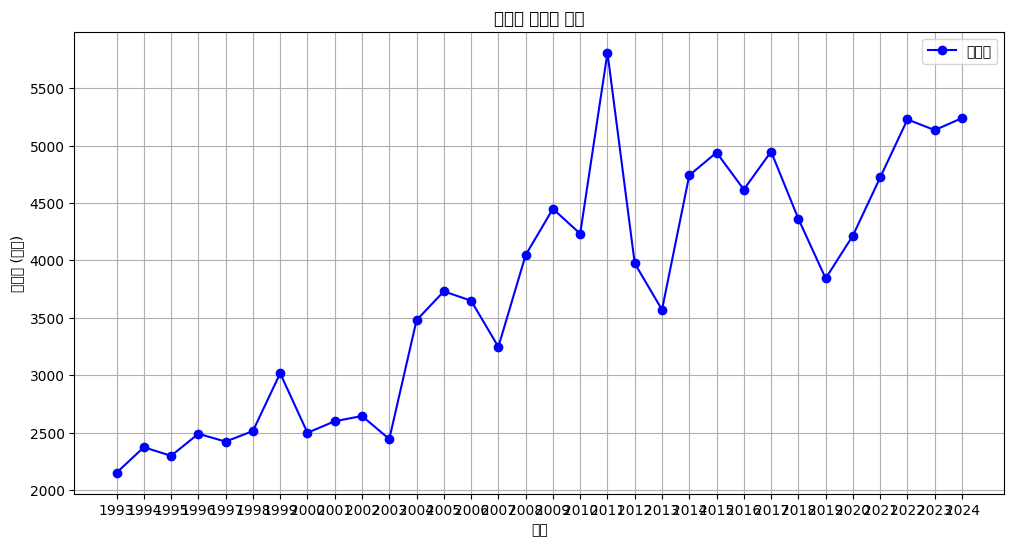

In [9]:
import matplotlib.pyplot as plt

# 데이터 변환: 도축가 값을 숫자로 변환
df_price['도축가'] = df_price['도축가'].str.replace(',', '').astype(int)

# 플로우차트 생성
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('도축가 (천원)')
plt.title('연도별 도축가 변화')
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 병합된 데이터 확인
print(df_merged)

# 그래프 설정
plt.figure(figsize=(14, 6))

# 도축가 그래프
plt.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color='b', label='도축가')

# Virus Count 그래프
plt.plot(df_merged['연도'], df_merged['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 도축가와 Virus Count 변화')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # X축 레이블 회전
# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)

NameError: name 'df_virus' is not defined

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 병합된 데이터 확인
print(df_merged)

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('연도별 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


NameError: name 'df_virus' is not defined

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])
ax1.set_ylim(bottom=3500 * 1000)  # 💡 도축가 y축 범위 시작점 설정

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('연도별 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


NameError: name 'df_virus' is not defined

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# ✅ 2013년 이후 데이터만 선택
df_merged = df_merged[df_merged['연도'] >= 2013]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])
ax1.set_ylim(bottom=3500 * 1000)  # y축 범위 조절

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('2013년 이후 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


NameError: name 'df_virus' is not defined

In [14]:
df_merged['Virus Count (전년도)'] = df_merged['Virus Count'].shift(1)
df_merged[['도축가', 'Virus Count (전년도)']].corr()


NameError: name 'df_merged' is not defined

In [15]:
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}년)'] = df_merged['Virus Count'].shift(i)
    print(f"시차 {i}년 vs 도축가: ", df_merged[['도축가', f'Virus Count (-{i}년)']].corr().iloc[0, 1])


NameError: name 'df_merged' is not defined

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 전처리
df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')
df_merged = df_merged[df_merged['연도'] >= 2013]

# 상관계수 계산
corr_value = df_merged[['도축가', 'Virus Count']].corr().iloc[0, 1]

# 그래프
fig, ax1 = plt.subplots(figsize=(14, 6))

# 도축가 - 왼쪽 y축
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(3500, df_merged['도축가'].max() + 500)
ax1.set_xticks(df_merged['연도'])

# Virus Count - 오른쪽 y축
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Virus Count (건수)', color=color2)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color2, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목에 상관계수 표시
plt.title(f'2013년 이후 도축가와 Virus Count 변화 (상관계수: {corr_value:.2f})')

# 기타 설정
fig.tight_layout()
plt.grid(True)
plt.show()


NameError: name 'df_virus' is not defined

In [17]:
# 기본 병합
df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')
df_merged = df_merged[df_merged['연도'] >= 2013].copy()

# 시차 변수 생성 (1~3년 전 Virus Count)
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}년)'] = df_merged['Virus Count'].shift(i)

# 상관계수 계산
for i in range(1, 4):
    corr = df_merged[['도축가', f'Virus Count (-{i}년)']].corr().iloc[0, 1]
    print(f"📊 시차 {i}년 - 도축가와의 상관계수: {corr:.2f}")


NameError: name 'df_virus' is not defined

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시차 1년 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-1년)',
    y='도축가',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('도축가 vs Virus Count (전년도)')
plt.xlabel('Virus Count (-1년)')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


NameError: name 'df_merged' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# 바이러스 유무 기준 (건수 0 이상이면 발생으로 간주)
df_merged['Virus_Occurred'] = df_merged['Virus Count'].apply(lambda x: '발생' if x > 0 else '무발생')

# Boxplot으로 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Virus_Occurred', y='도축가', data=df_merged)
plt.title('바이러스 발생 여부에 따른 도축가 비교')
plt.xlabel('바이러스 발생 여부')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

/Users/sungyoon/eda-repo-4/eda-repo-4-2/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sungyoon/eda-repo-4/eda-repo-4-2/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sungyoon/eda-repo-4/eda-repo-4-2/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sungyoon/eda-repo-4/eda-repo-4-2/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sungyoon/eda-repo-4/eda-repo-4-2/venv/lib/python3.13/site-

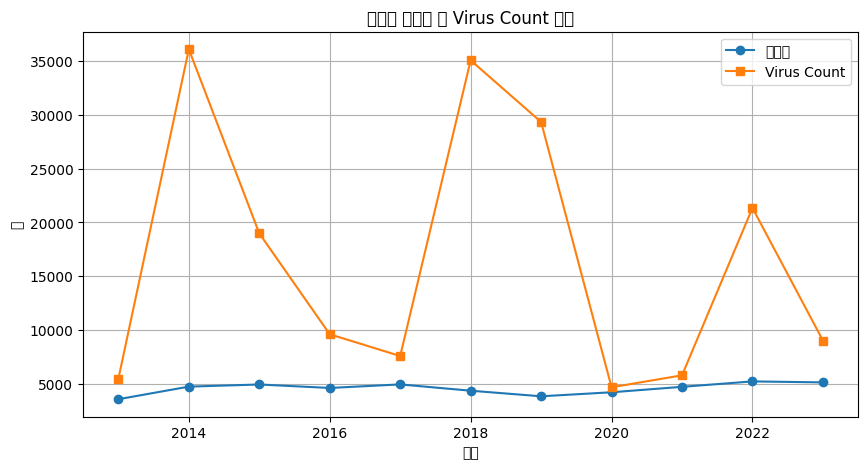

In [ ]:
# 꺾은선 그래프
plt.figure(figsize=(10, 5))
plt.plot(df_merged['연도'], df_merged['도축가'], label='도축가', marker='o')
plt.plot(df_merged['연도'], df_merged['Virus Count'], label='Virus Count', marker='s')
plt.title('연도별 도축가 및 Virus Count 변화')
plt.xlabel('연도')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-3년)',
    y='도축가',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('도축가 vs Virus Count (3년 전)')
plt.xlabel('Virus Count (-3년)')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


NameError: name 'df_merged' is not defined

<Figure size 800x600 with 0 Axes>

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# NaN 제거
df_reg = df_merged[['도축가', 'Virus Count (-3년)']].dropna()

# 변수 분리
X = df_reg[['Virus Count (-3년)']]
y = df_reg['도축가']

# 모델 적합
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print(f"기울기 (coef): {model.coef_[0]:.2f}")
print(f"절편 (intercept): {model.intercept_:.2f}")
print(f"R² (설명력): {model.score(X, y):.2f}")


NameError: name 'df_merged' is not defined

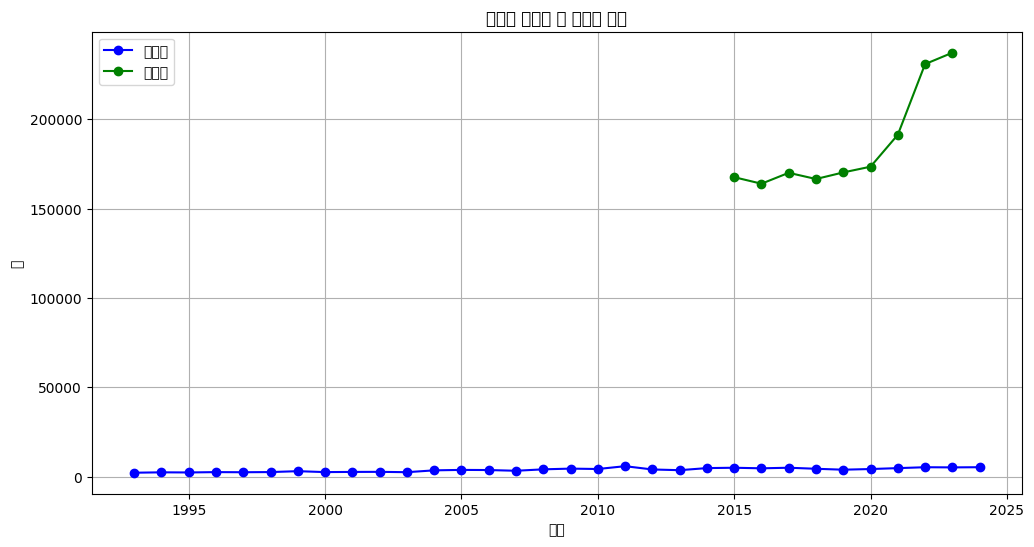

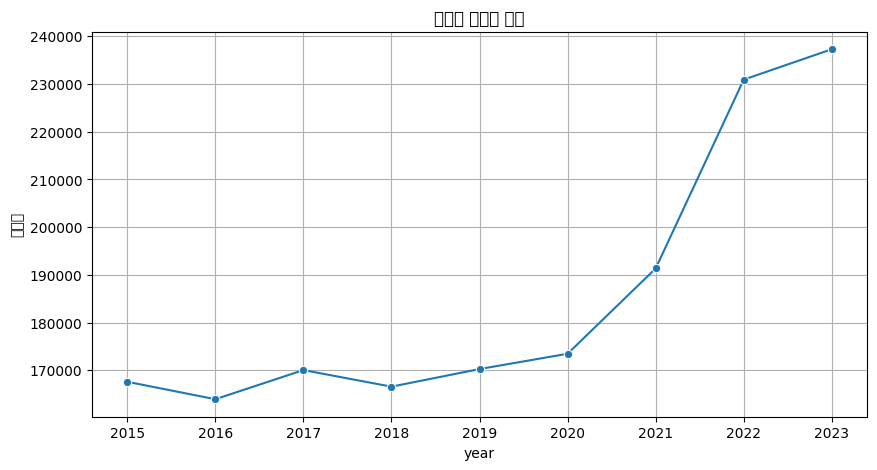

In [ ]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ RDS 접속 정보
conn = pymysql.connect(
    host='database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='psy',
    password='0000',
    database='pig',
    charset='utf8mb4'
)

# ✅ feed 테이블 불러오기 (사료비)
query = "SELECT * FROM feed"
df_feed = pd.read_sql(query, conn)

# ✅ 연결 종료
conn.close()

# ✅ 연도별 평균 사료비 계산
yearly_feed = df_feed.groupby('year').mean(numeric_only=True).reset_index()

# ✅ 도축가 전처리
df_price['도축가'] = pd.to_numeric(
    df_price['도축가'].astype(str).str.replace(',', ''), errors='coerce'
)

# ✅ 시각화: 도축가 & 사료비 변화
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')
plt.plot(yearly_feed['year'], yearly_feed['사료비'], marker='o', linestyle='-', color='g', label='사료비')
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 도축가 및 사료비 변화')
plt.grid(True)
plt.legend()
plt.show()

# ✅ 시각화: 사료비 단독 추이
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_feed, x='year', y='사료비', marker='o')
plt.title('연도별 사료비 추이')
plt.grid(True)
plt.show()


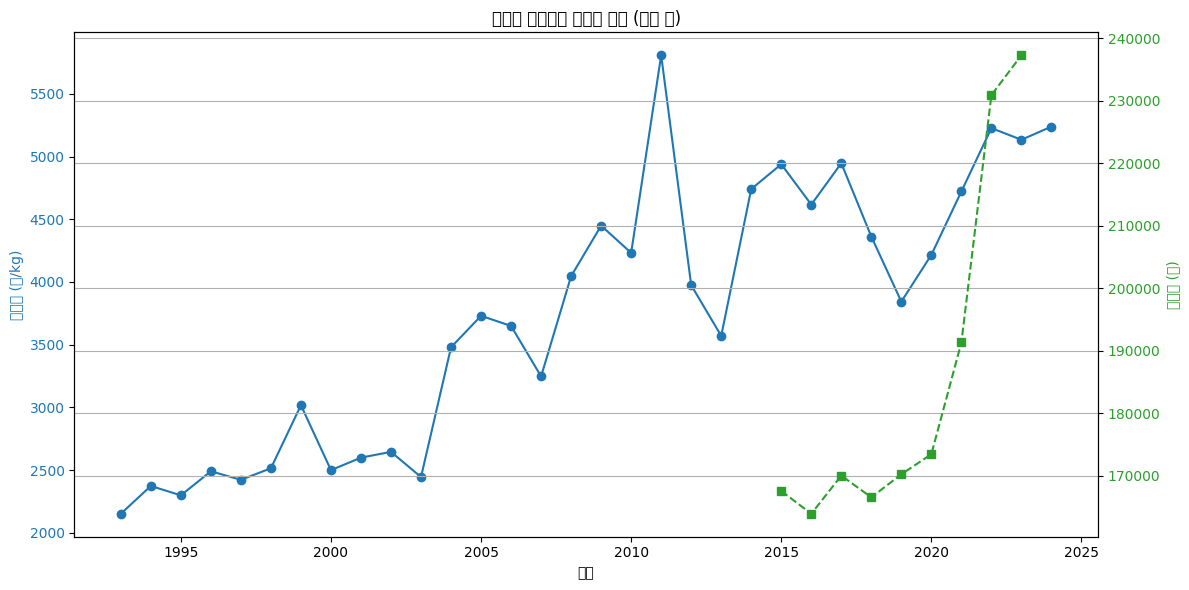

In [22]:
# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_price['연도'], df_price['도축가'], marker='o', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(yearly_feed['year'], yearly_feed['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('연도별 도축가와 사료비 변화 (이중 축)')
fig.tight_layout()
plt.grid(True)
plt.show()


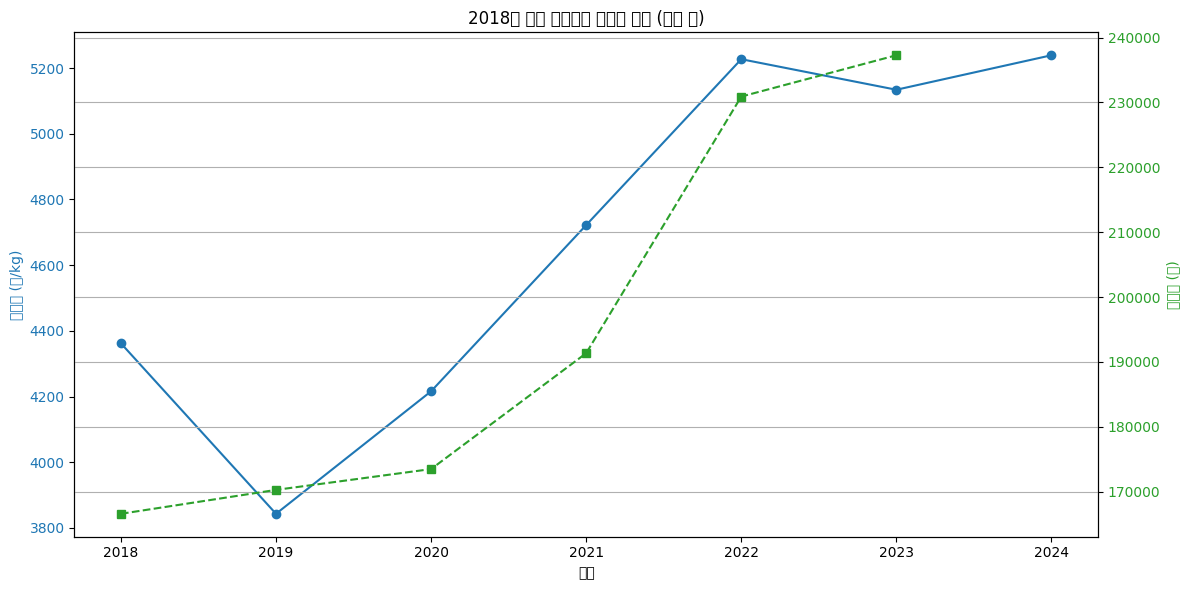

In [23]:
# 2018년 이후 데이터만 필터링
df_price_filtered = df_price[df_price['연도'] >= 2018]
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018]

# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_price_filtered['연도'], df_price_filtered['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_price_filtered['연도'])

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(yearly_feed_filtered['year'], yearly_feed_filtered['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('2018년 이후 도축가와 사료비 변화 (이중 축)')
fig.tight_layout()
plt.grid(True)
plt.show()


In [24]:
from meteostat import Monthly, Point
import pandas as pd
from datetime import datetime

# 위치 (서울 예시)
seoul = Point(37.5665, 126.9780)

# 기간 설정
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# 데이터 가져오기
data = Monthly(seoul, start, end)
df = data.fetch()
print(df)


            tavg  tmin  tmax   prcp  wspd    pres  tsun
time                                                   
2023-01-01  -1.4  -5.6   3.0   44.0   8.7  1024.7   NaN
2023-02-01   2.4  -1.7   7.1    1.2   8.2  1025.6   NaN
2023-03-01   9.8   4.3  15.9   16.6   8.4  1019.8   NaN
2023-04-01  13.8   9.0  18.8   92.7   9.1  1014.2   NaN
2023-05-01  19.7  14.7  24.9   82.4   8.4  1012.4   NaN
2023-06-01  23.4  19.8  27.7  134.0   7.9  1006.3   NaN
2023-07-01  26.7  23.9  30.0  305.7   7.7  1006.5   NaN
2023-08-01  27.1  24.4  30.6  324.6   7.8  1004.8   NaN
2023-09-01  23.6  20.3  27.4  137.7   7.3  1012.3   NaN
2023-10-01  15.8  11.6  20.8   42.8   6.9  1018.1   NaN
2023-11-01   6.6   3.0  11.4  129.9   9.1  1021.0   NaN
2023-12-01   1.2  -2.4   5.1   91.5   9.2  1024.3   NaN


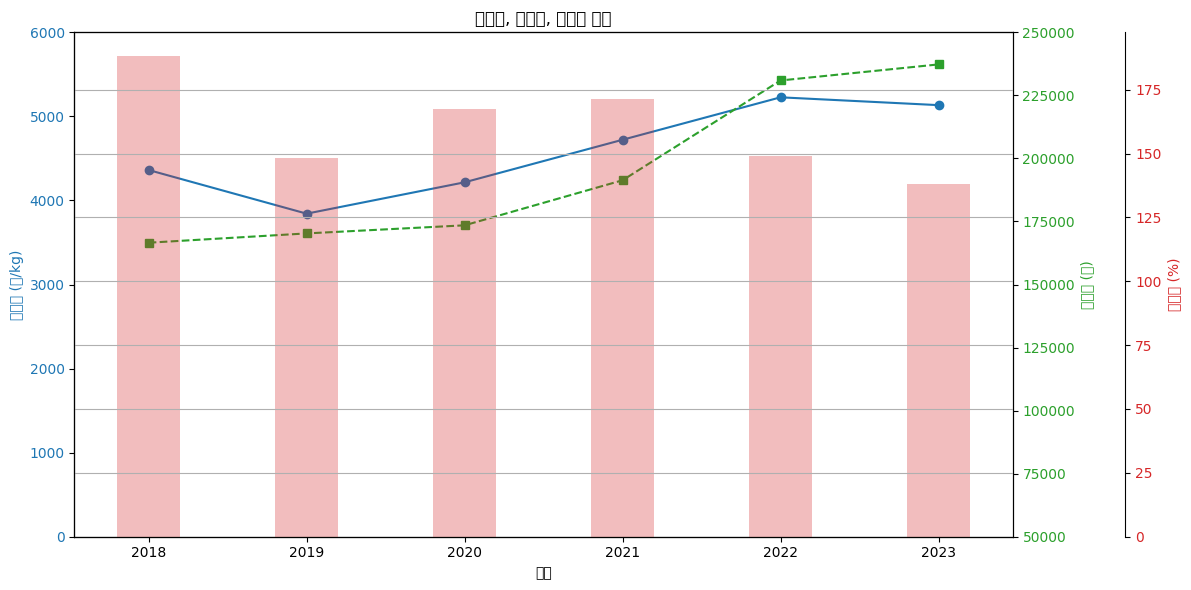

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# 출하체중 (kg) 고정값 설정
출하체중 = 110

# 2018년 이후 데이터 필터링
df_price_filtered = df_price[df_price['연도'] >= 2018].copy()
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018].copy()

# 연도 기준으로 데이터 병합 (도축가 + 사료비)
df_merged = df_price_filtered.merge(yearly_feed_filtered, left_on='연도', right_on='year')
df_merged['수익률'] = ((df_merged['도축가'] * 출하체중 - df_merged['사료비']) / df_merged['사료비']) * 100

# 📊 이중 y축 그래프: 도축가 + 사료비 + 수익률 추가

fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_merged['연도'])

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(df_merged['연도'], df_merged['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 🎯 수익률 (막대그래프)
ax3 = ax1.twinx()  # 세 번째 축
ax3.spines['right'].set_position(("axes", 1.12))  # 오른쪽 y축 바깥으로 이동
color3 = 'tab:red'
ax3.bar(df_merged['연도'], df_merged['수익률'], alpha=0.3, color=color3, width=0.4, label='수익률')
ax3.set_ylabel('수익률 (%)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)

# 제목 및 꾸미기
plt.title('도축가, 사료비, 수익률 변화')
ax1.set_ylim(0, 6000)  # 도축가 y축 범위 설정
ax2.set_ylim(50000, 250000)  # 사료비 y축 범위 설정
fig.tight_layout()
plt.grid(True)
plt.show()
# 필요한 데이터 준비
출하체중 = 110

# 2018년 이후 데이터 필터링
df_price_filtered = pd.DataFrame({
    '연도': [2018, 2019, 2020, 2021, 2022, 2023],
    '도축가': [4362, 3843, 4216, 4722, 5227, 5134]
})

yearly_feed_filtered = pd.DataFrame({
    'year': [2018, 2019, 2020, 2021, 2022, 2023],
    '사료비': [166581.4, 170268.0, 173476.6, 191343.0, 230910.4, 237279.8]
})

# 연도 기준으로 데이터 병합 (도축가 + 사료비)
df_merged = df_price_filtered.merge(yearly_feed_filtered, left_on='연도', right_on='year')
df_merged['수익률'] = ((df_merged['도축가'] * 출하체중 - df_merged['사료비']) / df_merged['사료비']) * 100

# 📊 이중 y축 그래프: 도축가 + 사료비 + 수익률 추가

fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_merged['연도'])

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(df_merged['연도'], df_merged['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 🎯 수익률 (막대그래프)
ax3 = ax1.twinx()  # 세 번째 축
ax3.spines['right'].set_position(("axes", 1.12))  # 오른쪽 y축 바깥으로 이동
color3 = 'tab:red'
ax3.bar(df_merged['연도'], df_merged['수익률'], alpha=0.3, color=color3, width=0.4, label='수익률')
ax3.set_ylabel('수익률 (%)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)

# 제목 및 꾸미기
plt.title('도축가, 사료비, 수익률 변화')
ax1.set_ylim(0, 6000)  # 도축가 y축 범위 설정
ax2.set_ylim(50000, 250000)  # 사료비 y축 범위 설정
fig.tight_layout()
plt.grid(True)
plt.show()

In [43]:
import pandas as pd

# 출하체중 설정
출하체중 = 110

# 2018년 이후 필터링
df_price_filtered = df_price[df_price['연도'] >= 2018].copy()
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018].copy()

# 데이터 병합
df_merged = df_price_filtered.merge(yearly_feed_filtered, left_on='연도', right_on='year')

# 수익률 계산
df_merged['수익률(%)'] = ((df_merged['도축가'] * 출하체중 - df_merged['사료비']) / df_merged['사료비']) * 100

# 필요한 열만 정리
df_summary = df_merged[['연도', '도축가', '사료비', '수익률(%)']].copy()
df_summary = df_summary.rename(columns={
    '연도': '년도',
    '도축가': '도축가(원/kg)',
    '사료비': '사료비(원/두)'
})

# 수익률 소수점 2자리로 반올림
df_summary['수익률(%)'] = df_summary['수익률(%)'].round(2)

# 결과 출력
print(df_summary)


     년도  도축가(원/kg)  사료비(원/두)  수익률(%)
0  2018       4362  166581.4  188.04
1  2019       3843  170268.0  148.27
2  2020       4216  173476.6  167.33
3  2021       4722  191343.0  171.46
4  2022       5227  230910.4  149.00
5  2023       5134  237279.8  138.01


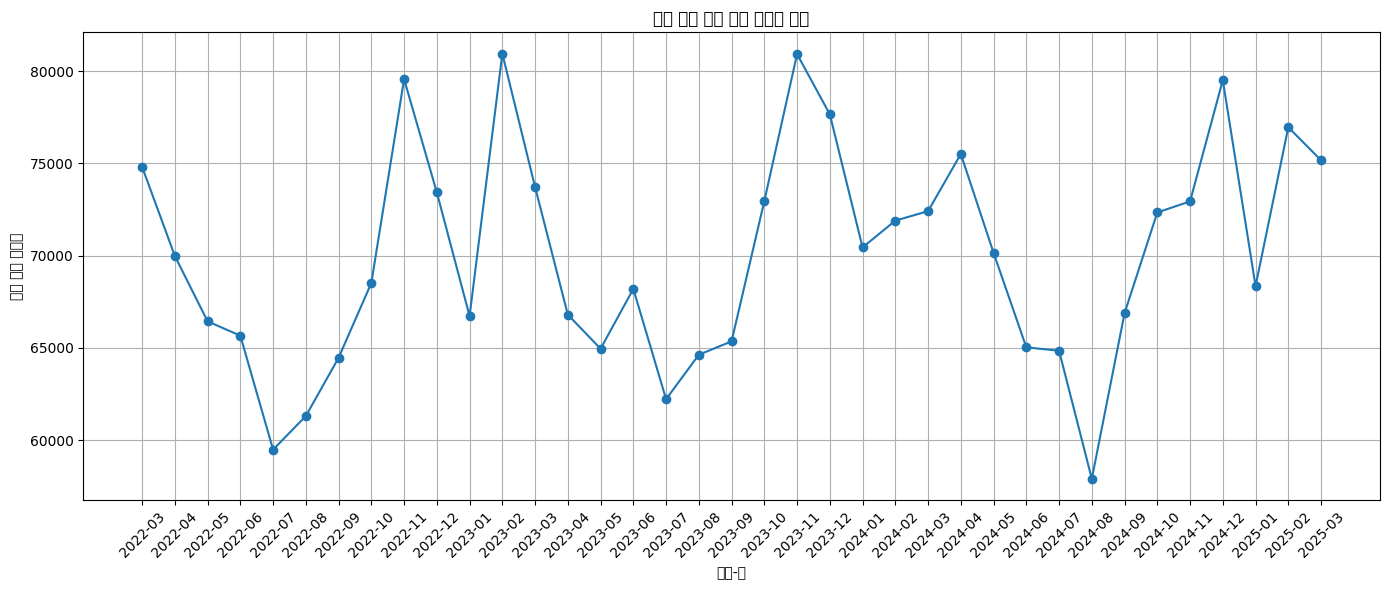

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/sungyoon/Desktop/프로젝트/pig.xlsx'  # 파일 이름이 다르면 여기를 수정하세요
df = pd.read_excel(file_path, sheet_name='데이터')

# 날짜 컬럼을 datetime 형식으로 변환
df['연월일'] = pd.to_datetime(df['연월일'])

# '연도-월' 컬럼 생성 (월 단위 그룹화를 위한)
df['연도-월'] = df['연월일'].dt.to_period('M')

# 월별 평균 출하 마릿수 계산
monthly_avg = df.groupby('연도-월')['출하마릿수'].mean().reset_index()
monthly_avg['연도-월'] = monthly_avg['연도-월'].astype(str)  # 문자열로 변환 (x축 표시용)

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg['연도-월'], monthly_avg['출하마릿수'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('월별 평균 돼지 출하 마릿수 변화')
plt.xlabel('연도-월')
plt.ylabel('평균 출하 마릿수')
plt.grid(True)
plt.tight_layout()
plt.show()


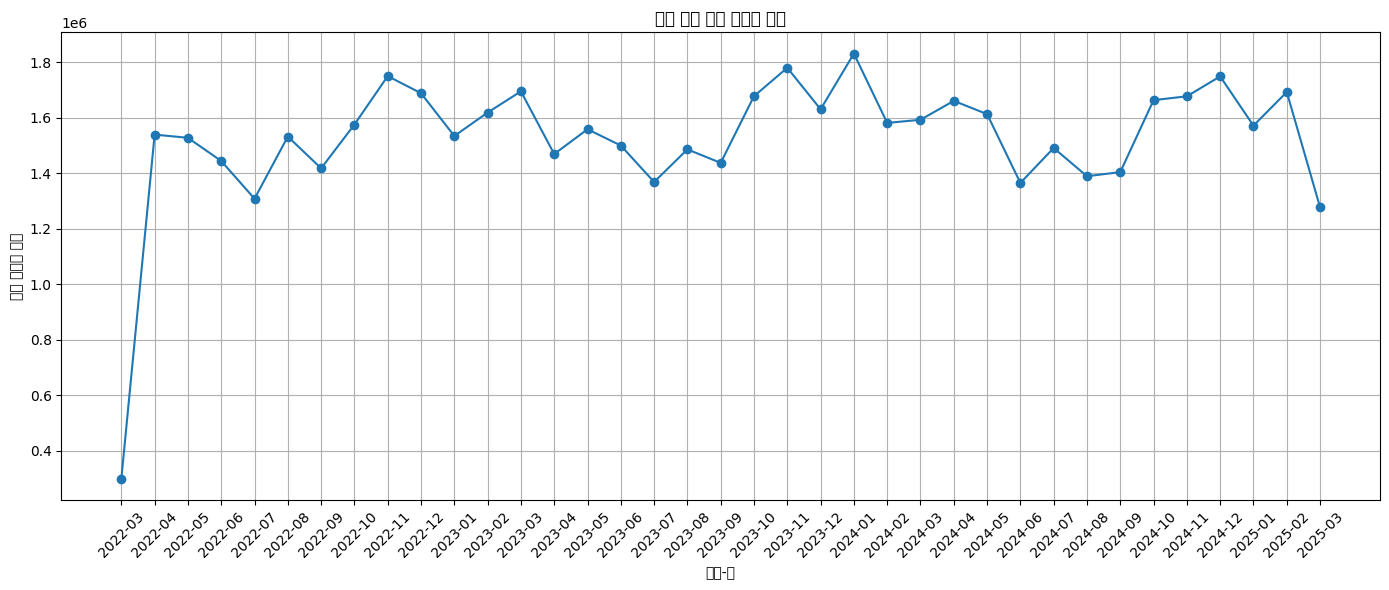

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀 파일 불러오기
file_path = '/Users/sungyoon/Desktop/프로젝트/pig.xlsx'  # 같은 폴더에 있어야 함
df = pd.read_excel(file_path, sheet_name='데이터')

# 2. 날짜 컬럼을 datetime 형식으로 변환
df['연월일'] = pd.to_datetime(df['연월일'])

# 3. '연도-월' 컬럼 생성 (월 단위 그룹화를 위해)
df['연도-월'] = df['연월일'].dt.to_period('M')

# 4. 월별 출하 마릿수 합계 계산
monthly_sum = df.groupby('연도-월')['출하마릿수'].sum().reset_index()
monthly_sum['연도-월'] = monthly_sum['연도-월'].astype(str)  # 문자열로 변환 (x축 표시용)

# 5. 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(monthly_sum['연도-월'], monthly_sum['출하마릿수'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('월별 돼지 출하 마릿수 합계')
plt.xlabel('연도-월')
plt.ylabel('출하 마릿수 합계')
plt.grid(True)
plt.tight_layout()
plt.show()


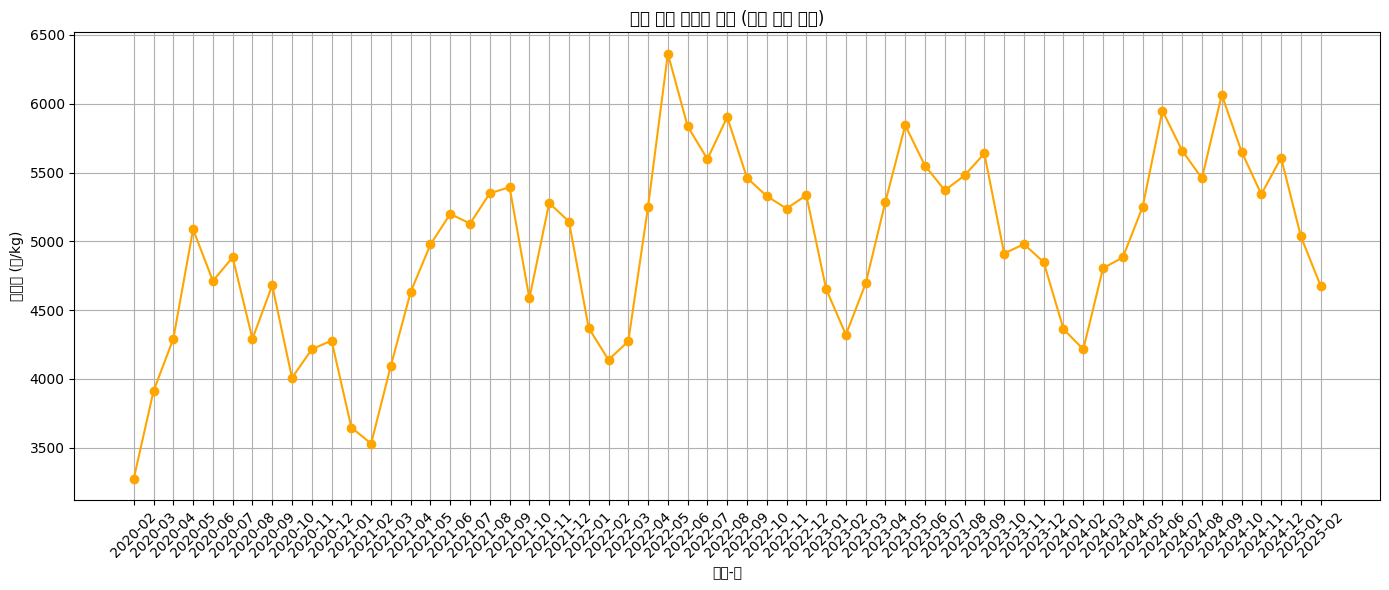

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 파일 경로 설정
file_path = '/Users/sungyoon/Desktop/프로젝트/report.xltx'  # 같은 폴더에 있어야 함

# 2. 모든 시트에서 데이터 불러오기
xls = pd.ExcelFile(file_path)ㄴㄴ
sheet_names = xls.sheet_names

all_data = []

for sheet in sheet_names:
    try:
        df = pd.read_excel(file_path, sheet_name=sheet)
        
        # 유효한 날짜만 남기기
        df = df[df['경락일자'].notna()].copy()

        # 날짜 변환
        df['경락일자'] = pd.to_datetime(df['경락일자'], errors='coerce')

        # 가격 문자열 → 숫자
        df['평균가격(원/kg)'] = pd.to_numeric(
            df['평균'].astype(str).str.replace(',', '').str.strip(),
            errors='coerce'
        )

        # 필요한 컬럼만 저장
        all_data.append(df[['경락일자', '평균가격(원/kg)']])

    except Exception as e:
        # 컬럼 구조가 맞지 않으면 건너뜀
        continue

# 3. 모든 시트 데이터를 하나로 합치기
merged_df = pd.concat(all_data).dropna().reset_index(drop=True)

# 4. '연도-월' 단위로 그룹화
merged_df['연도-월'] = merged_df['경락일자'].dt.to_period('M')
monthly_avg = merged_df.groupby('연도-월')['평균가격(원/kg)'].mean().reset_index()
monthly_avg['연도-월'] = monthly_avg['연도-월'].astype(str)

# 5. 플로우 차트 그리기
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg['연도-월'], monthly_avg['평균가격(원/kg)'], marker='o', linestyle='-', color='orange')
plt.title('월별 평균 도축가 변화 (모든 시트 통합)')
plt.xlabel('연도-월')
plt.ylabel('도축가 (원/kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

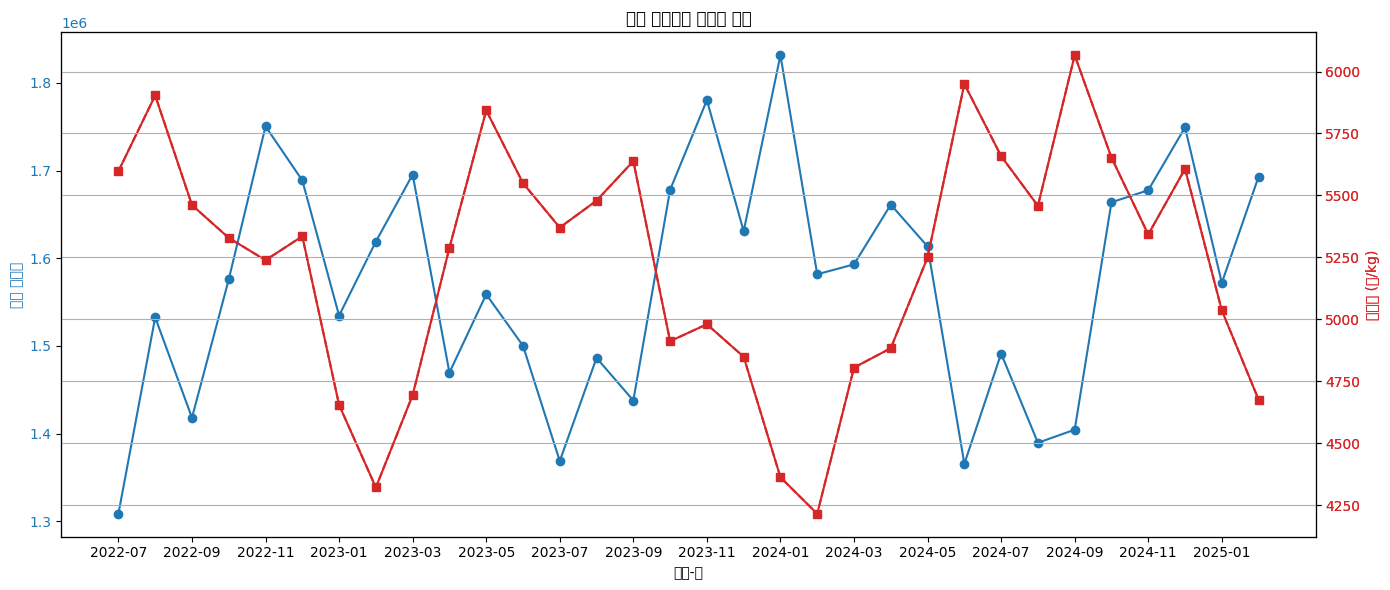

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='AppleGothic')

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 데이터 불러오기
pig_df = pd.read_excel("/home/sungyoon/project_file/pig.xlsx", sheet_name='데이터')
price_df = pd.read_excel("/home/sungyoon/project_file/report.xltx", sheet_name=None)  # 모든 시트 불러오기
# 맥북 주소/Users/sungyoon/Desktop/프로젝트

# 2. 출하량 데이터 전처리
pig_df['연월일'] = pd.to_datetime(pig_df['연월일'])
pig_df['연도-월'] = pig_df['연월일'].dt.to_period('M')
monthly_pig = pig_df.groupby('연도-월')['출하마릿수'].sum().reset_index()
monthly_pig['연도-월'] = monthly_pig['연도-월'].astype(str)

# 3. 도축가 모든 시트 통합
all_price = []
for name, sheet in price_df.items():
    try:
        df = sheet[sheet['경락일자'].notna()].copy()
        df['경락일자'] = pd.to_datetime(df['경락일자'], errors='coerce')
        df['평균가격(원/kg)'] = pd.to_numeric(
            df['평균'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
        all_price.append(df[['경락일자', '평균가격(원/kg)']])
    except:
        continue

merged_price_df = pd.concat(all_price).dropna().reset_index(drop=True)
merged_price_df['연도-월'] = merged_price_df['경락일자'].dt.to_period('M')
monthly_price = merged_price_df.groupby('연도-월')['평균가격(원/kg)'].mean().reset_index()
monthly_price['연도-월'] = monthly_price['연도-월'].astype(str)

# 4. 병합 및 필터링 (2022년 7월 이후)
merged = pd.merge(monthly_pig, monthly_price, on='연도-월', how='inner')
merged = merged[merged['연도-월'] >= '2022-07']

# 5. 이중 y축 그래프 그리기
fig, ax1 = plt.subplots(figsize=(14, 6))

# 출하량 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도-월')
ax1.set_ylabel('출하 마릿수', color=color1)
ax1.plot(merged['연도-월'], merged['출하마릿수'], color=color1, marker='o', label='출하 마릿수')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(merged['연도-월'][::2])
ax1.set_xticklabels(merged['연도-월'][::2])


# 도축가 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('도축가 (원/kg)', color=color2)
ax2.plot(merged['연도-월'], merged['평균가격(원/kg)'], color=color2, linestyle='-', label='도축가')  # 점 대신 선으로 변경
ax2.tick_params(axis='y', labelcolor=color2)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('도축가 (원/kg)', color=color2)
ax2.plot(merged['연도-월'], merged['평균가격(원/kg)'], color=color2, marker='s', linestyle='--', label='도축가')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('출하 마릿수와 도축가 비교')
plt.grid(True)
fig.tight_layout ()
plt.show()


In [ ]:
0